# EDA for UFC Data

#### EDA Steps
1. Question (complete in project proposal)
2. Read in data (complete)
3. Check packaging (complete)
4. Look at the Bottom and Top of your data (looked at head and tail)
5. Check your "n"s (complete_
6. Validate with at least one external data source (complete)
7. Make a plot (complete)
8. Try the easy solution first (complete)
9. Follow up


In [178]:
# Load the necessary packages
library(tidyverse)
library(lubridate)
library(janitor)

### 1. Question

Predictive main question:

For fights that do not end in submission or TKO, what are the strongest predictors of who will win?

This is a predictive question.

Some natural questions that stem from the main research question are:

Do judges award higher scores for striking (e.g. punching and kicking) over grappling (e.g. wrestling and submission attempts)?
Do judges consistnely value the same criteria?
Do judges consider other factors such as the fighters win streak or size?

Read the [README](https://github.com/UBC-MDS/DSCI522_group315) of the Project repo for a further explanation.

### 2. Read in Data

In [179]:
# 2. Read in data into jupyter
read_data <- read.csv("https://github.com/SamEdwardes/ufc-data/raw/master/data.csv")

### 3. Check Packaging

In [180]:
# 3. Check initial rows and columns ("n's"). These match what is in the csv file. 
print(nrow(read_data))
print(ncol(read_data))

[1] 5144
[1] 145


**Insights:**
- This matches what I expect from the csv as the number of rows and columns match when I check the csv document. 

In [181]:
read_data <- read_data %>% 
    drop_na()

### Split X_train and X_test

In [182]:
## set the seed and split data into train and test sets
set.seed(12)
split_data <- sample(seq_len(nrow(read_data)), size = 0.8 * nrow(read_data))
y <- c("Winner")

X_train <- read_data[split_data, -(6)]
y_train <- read_data[split_data, (6)]
X_test <- read_data[-split_data, -(6)]
y_test <- read_data[-split_data, (6)]

nrow(X_train)
ncol(X_train)

[1] 2684

[1] 144

### 4 Look at the Bottom and Top of your data

In [183]:
head(X_train)

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,...,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
598,Leon Edwards,Peter Sobotta,Rich Mitchell,2018-03-17,"London, England, United Kingdom",False,Welterweight,3,0,2,...,1,1,0,6,Southpaw,182.88,187.96,170,31,26
471,Curtis Millender,Max Griffin,Jason Herzog,2018-07-07,"Las Vegas, Nevada, USA",False,Welterweight,3,0,1,...,1,0,0,1,Orthodox,187.96,193.04,170,32,30
457,Darren Elkins,Alexander Volkanovski,Jason Herzog,2018-07-14,"Boise, Idaho, USA",False,Featherweight,3,0,4,...,3,1,0,14,Orthodox,177.80,180.34,145,29,34
1653,Hayder Hassan,Vicente Luque,Jorge Alonso,2015-12-19,"Orlando, Florida, USA",False,Welterweight,3,1,0,...,0,0,0,0,,177.80,177.80,170,24,33
3937,Dennis Siver,Paul Kelly,Dan Miragliotta,2009-11-14,"Manchester, England, United Kingdom",False,Lightweight,3,0,2,...,2,1,0,3,Orthodox,167.64,177.80,145,25,30
2949,Urijah Faber,Ivan Menjivar,Jason Herzog,2013-02-23,"Anaheim, California, USA",False,Bantamweight,3,0,1,...,0,1,0,2,Orthodox,167.64,170.18,135,30,33


In [184]:
# 4. Inspect head of data to see if it reading in properly. 
head(y_train)

[1] Red  Red  Blue Blue Red  Red 
Levels: Blue Draw Red

In [185]:
# 4. Inspect tail of data to make sure everything is correct.
tail(X_train)

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,...,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3402,Cyrille Diabate,Anthony Perosh,Marc Goddard,2011-11-05,"Birmingham, England, United Kingdom",False,Light Heavyweight,3,0,1,...,1,0,0,2,Southpaw,198.12,205.74,205,39,38
3724,Yves Edwards,John Gunderson,Kerry Hatley,2010-09-15,"Austin, Texas, USA",False,Lightweight,3,0,1,...,3,1,0,6,Southpaw,175.26,185.42,155,31,33
708,Robbie Lawler,Rafael Dos Anjos,Herb Dean,2017-12-16,"Winnipeg, Manitoba, Canada",False,Welterweight,5,0,2,...,6,0,0,13,Southpaw,180.34,187.96,170,33,35
4460,Martin Kampmann,Drew McFedries,Herb Dean,2007-03-03,"Columbus, Ohio, USA",False,Middleweight,3,0,1,...,0,1,0,2,Orthodox,182.88,182.88,170,28,24
4227,Dustin Hazelett,Joshua Burkman,Josh Rosenthal,2008-06-21,"Las Vegas, Nevada, USA",False,Welterweight,3,1,0,...,0,2,0,3,Orthodox,185.42,193.04,170,28,22
1399,Kyle Noke,Keita Nakamura,Herb Dean,2016-07-13,"Sioux Falls, South Dakota, USA",False,Welterweight,3,1,0,...,3,2,0,6,Southpaw,185.42,193.04,170,32,36


**Insights**

 - Data structure looks good. The first and last column look the same as the csv meaning there is no missing data and the columns are correctly labeled. There is no hidden metadata in the csv either. 
 - There are some problems with b_ and r_ sig str as they are 2 of 3 versus a percentage. This will need to be converted to get accurate information. 
 - There are columns like format and referee which are not relevant to the fight. 

### 5. Check your "n"s

In [186]:
# 5. Find summary statistics to see the different column descriptions & find number of NAs
summary(X_train)

           R_fighter               B_fighter               Referee    
 Jim Miller     :  18   Jeremy Stephens :  15   Herb Dean      : 406  
 Demian Maia    :  17   Charles Oliveira:  12   John McCarthy  : 229  
 Frankie Edgar  :  16   Nik Lentz       :  11   Dan Miragliotta: 226  
 Michael Bisping:  16   Kevin Lee       :  10   Mario Yamasaki : 194  
 Ross Pearson   :  15   Evan Dunham     :   9   Marc Goddard   : 165  
 Diego Sanchez  :  14   Stephen Thompson:   9   Yves Lavigne   : 152  
 (Other)        :2588   (Other)         :2618   (Other)        :1312  
         date                                 location    title_bout  
 2018-09-08:  13   Las Vegas, Nevada, USA         : 575   False:2516  
 2014-05-10:  12   London, England, United Kingdom:  64   True : 168  
 2014-06-28:  12   Montreal, Quebec, Canada       :  55               
 2014-10-04:  12   Chicago, Illinois, USA         :  52               
 2015-11-14:  12   Toronto, Ontario, Canada       :  49               
 2016-

**Observations:**
> Note the data above looks good in the ranges. There are also some columns that should be removed like R_draw and B_draw which never have a value other than 0. Most of the data seems like it has appropriate highs and lows for each column.

> I also noticed there seem to be a lot of columns on the same statistic:

>B_avg_BODY_att
R_avg_BODY_att
B_avg_opp_BODY_att
R_avg_opp_BODY_att
I did a bit further digging to understand what makes them different.

>Definitions for reference:

>opp containing columns is the average of damage done by the opponent on the fighter Source: Original Kaggle Source. Therefore, it is not usually the case the R_avg_BODY_att would be reflected in B_avg_opp_BODY_att if it didn't do any damage.
Other definitions:

>att: attempt
landed: attempt connected with the opponent
kd: knockdown

In [187]:
# 5. Check n's again
nrow(X_train)
ncol(X_train)

[1] 2684

[1] 144

### Inspecting Values

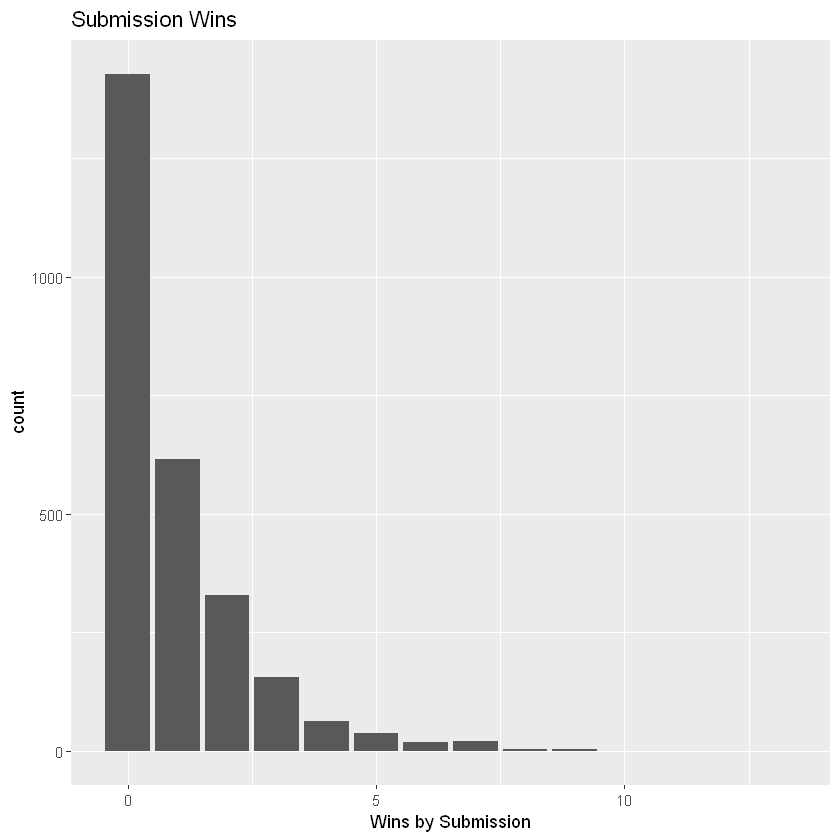

In [188]:
# 5. Compare when a fighter is in the R_fighter and B_fighter columns to see are unique values for each appearence. For example, if a 
# fighter shows up in the red column for a fight they will not show up in the blue column for the same fight. 

X_train %>%
    ggplot(aes(X_train$R_win_by_Submission)) +
    geom_bar() +
    labs(title="Submission Wins", x = "Wins by Submission")

> **Observations:**

- This is not what I expected at all. I was expecting a binary response 1 for yes and 0 for no. These statistics show that the win columns for submission, decision, KO, etc.. are all for lifetime stats.

- For our analysis we need to have the stat for how a fight ends/ how the winner wins the match to answer our research question. I can do this with another dataset that was published in the same repository as our original dataset.

In [189]:
# We need the 'win by' column from the read_fight data because our current win data doesn't have this column to answer our research question
# as we need to filter by the fights that went to judges' decision.

# import the new data file from the same source as our original
read_fight <- read.csv("https://raw.githubusercontent.com/SamEdwardes/ufc-data/master/raw_total_fight_data.csv", 
                       header = TRUE, sep = ";") %>% 
        mutate(date = mdy(date)) %>%
        select("R_fighter", "B_fighter", "win_by", "date")

# reformat the date on the initial data to be able to left join on date and fighter

X_train <- X_train %>%
        mutate(date = ymd(date))
# merge together the old and new dataframes
X_train <- left_join(X_train, read_fight, by = c("R_fighter", "B_fighter", "date"))

# We need to do the same to our test data
X_test <- X_test %>%
        mutate(date = ymd(date))
# merge together the old and new dataframes
X_test <- left_join(X_test, read_fight, by = c("R_fighter", "B_fighter", "date"))

tail(X_train)

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,win_by
,<fct>,<fct>,<fct>,<date>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2679,Cyrille Diabate,Anthony Perosh,Marc Goddard,2011-11-05,"Birmingham, England, United Kingdom",False,Light Heavyweight,3,0,1,...,0,0,2,Southpaw,198.12,205.74,205,39,38,Submission
2680,Yves Edwards,John Gunderson,Kerry Hatley,2010-09-15,"Austin, Texas, USA",False,Lightweight,3,0,1,...,1,0,6,Southpaw,175.26,185.42,155,31,33,Decision - Unanimous
2681,Robbie Lawler,Rafael Dos Anjos,Herb Dean,2017-12-16,"Winnipeg, Manitoba, Canada",False,Welterweight,5,0,2,...,0,0,13,Southpaw,180.34,187.96,170,33,35,Decision - Unanimous
2682,Martin Kampmann,Drew McFedries,Herb Dean,2007-03-03,"Columbus, Ohio, USA",False,Middleweight,3,0,1,...,1,0,2,Orthodox,182.88,182.88,170,28,24,Submission
2683,Dustin Hazelett,Joshua Burkman,Josh Rosenthal,2008-06-21,"Las Vegas, Nevada, USA",False,Welterweight,3,1,0,...,2,0,3,Orthodox,185.42,193.04,170,28,22,Submission
2684,Kyle Noke,Keita Nakamura,Herb Dean,2016-07-13,"Sioux Falls, South Dakota, USA",False,Welterweight,3,1,0,...,2,0,6,Southpaw,185.42,193.04,170,32,36,Submission


In [190]:
nrow(X_train)

[1] 2684

> **Observations:**

The win by column was able to join to our data with the correct win by column. The values were what I expected for the column win by. There is no null values which means everything mapped. The nrows match our initial number of rows of 2,693 on the data after we dropped NAs.

In [191]:
# Find the different values we need to answer the question we have. Since we are only looking at judge's choice, we can only keep decsions. 
unique(X_train$win_by)

[1] KO/TKO                  Decision - Unanimous    Submission             
[4] Decision - Split        Overturned              TKO - Doctor's Stoppage
[7] Decision - Majority     Could Not Continue      DQ                     
10 Levels: Could Not Continue Decision - Majority ... TKO - Doctor's Stoppage

### Extra Wrangling

In [192]:
# removed the columns that are not important to our question and columns that have no values
X_train <- X_train %>% 
    select(-c("date", "Referee", "title_bout", "weight_class", "no_of_rounds", 
              "location", "B_win_by_TKO_Doctor_Stoppage", "B_win_by_Submission", "B_win_by_KO.TKO", 
              "R_win_by_TKO_Doctor_Stoppage", "R_win_by_Submission", "R_win_by_KO.TKO", 
              "R_win_by_Submission", "R_win_by_KO.TKO", 
              "R_win_by_TKO_Doctor_Stoppage", "R_win_by_Submission", "R_win_by_KO.TKO", "B_draw", "R_draw", 
              "B_current_lose_streak", "B_current_win_streak", "R_current_lose_streak", "R_current_win_streak",
             "B_longest_win_streak", "B_losses", "B_total_rounds_fought", "B_total_time_fought.seconds.", "B_total_title_bouts",
             "B_win_by_Decision_Majority", "B_win_by_Decision_Unanimous", "B_win_by_Decision_Split", "B_wins", "B_Stance",
             "R_longest_win_streak", "R_losses", "B_total_rounds_fought", "R_total_time_fought.seconds.", "R_total_title_bouts",
             "R_win_by_Decision_Majority", "R_win_by_Decision_Unanimous", "R_win_by_Decision_Split", "R_wins", "R_Stance", 
              "R_total_rounds_fought"))

In [193]:
# filter the data by matches that ended in a decision
X_train <- X_train %>%
    filter(win_by == "Decision - Split" | win_by ==  "Decision - Unanimous" | win_by ==  "Decision - Majority")

In [194]:
# 5. Compare when a fighter is in the R_fighter and B_fighter columns to see are unique values for each appearence. For example, if a 
# fighter shows up in the red column for a fight they will not show up in the blue column for the same fight. 

X_train %>%
    filter(R_fighter == "Zak Cummings") %>%
    select(R_fighter, B_fighter, R_avg_BODY_att, B_avg_BODY_att, R_avg_opp_BODY_att, B_avg_opp_BODY_att)

R_fighter,B_fighter,R_avg_BODY_att,B_avg_BODY_att,R_avg_opp_BODY_att,B_avg_opp_BODY_att
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Zak Cummings,Michel Prazeres,7.125,9.5,6.375,10.9


In [195]:
X_train %>%
    filter(B_fighter == "Zak Cummings") %>%
    select(R_fighter, B_fighter, R_avg_BODY_att, B_avg_BODY_att, R_avg_opp_BODY_att, B_avg_opp_BODY_att)

R_fighter,B_fighter,R_avg_BODY_att,B_avg_BODY_att,R_avg_opp_BODY_att,B_avg_opp_BODY_att
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Santiago Ponzinibbio,Zak Cummings,10.0,7.200000,11.16667,7.000000
Nicolas Dalby,Zak Cummings,19.0,4.250000,17.50000,2.750000
Trevor Smith,Zak Cummings,13.8,8.666667,13.70000,6.444444
Yan Cabral,Zak Cummings,0.0,0.000000,1.00000,6.000000


**Observations**

- Each fight is unique which means each row has unique data. 
- The values for the same stat across R_avg, B_avg, R_avg_opp, B_avg_opp are all reporting unique values. This shows that these columns do not duplicate.

### 6. Validate with at least one external data source

In [196]:
# put X_train and y_train together
train <- read_data[split_data,]
train <-train %>%
        mutate(date = ymd(date))
train <- left_join(train, read_fight, by = c("R_fighter", "B_fighter", "date"))
train <- train %>% 
    select(-c("date", "Referee", "title_bout", "weight_class", "no_of_rounds", 
              "location", "B_win_by_TKO_Doctor_Stoppage", "B_win_by_Submission", "B_win_by_KO.TKO", 
              "R_win_by_TKO_Doctor_Stoppage", "R_win_by_Submission", "R_win_by_KO.TKO", 
              "R_win_by_Submission", "R_win_by_KO.TKO", 
              "R_win_by_TKO_Doctor_Stoppage", "R_win_by_Submission", "R_win_by_KO.TKO", "B_draw", "R_draw", 
              "B_current_lose_streak", "B_current_win_streak", "R_current_lose_streak", "R_current_win_streak",
             "B_longest_win_streak", "B_losses", "B_total_rounds_fought", "B_total_time_fought.seconds.", "B_total_title_bouts",
             "B_win_by_Decision_Majority", "B_win_by_Decision_Unanimous", "B_win_by_Decision_Split", "B_wins", "B_Stance",
             "R_longest_win_streak", "R_losses", "B_total_rounds_fought", "R_total_time_fought.seconds.", "R_total_title_bouts",
             "R_win_by_Decision_Majority", "R_win_by_Decision_Unanimous", "R_win_by_Decision_Split", "R_wins", "R_Stance", 
              "R_total_rounds_fought"))
train <- train %>%
    filter(win_by == "Decision - Split" | win_by ==  "Decision - Unanimous" | win_by ==  "Decision - Majority")

In [198]:
# 6. Validate with at least one external data source
train %>%
    filter(R_fighter == "Aaron Phillips") %>%
    select(c(R_Height_cms, R_Reach_cms, R_Weight_lbs, Winner, win_by))

R_Height_cms,R_Reach_cms,R_Weight_lbs,Winner,win_by
<dbl>,<dbl>,<dbl>,<fct>,<fct>
175.26,177.8,135,Blue,Decision - Unanimous


**Observations:**
- Verified the Aaron Philips and Matt Hobar match happened ended in an Unanimous Decsion with Hobar winning [Source: Tapout]((https://www.tapology.com/fightcenter/bouts/146806-ufc-fight-night-49-matt-the-crowbar-hobar-vs-aaron-the-model-phillips). The characteristics for the match including the location and date are the same.

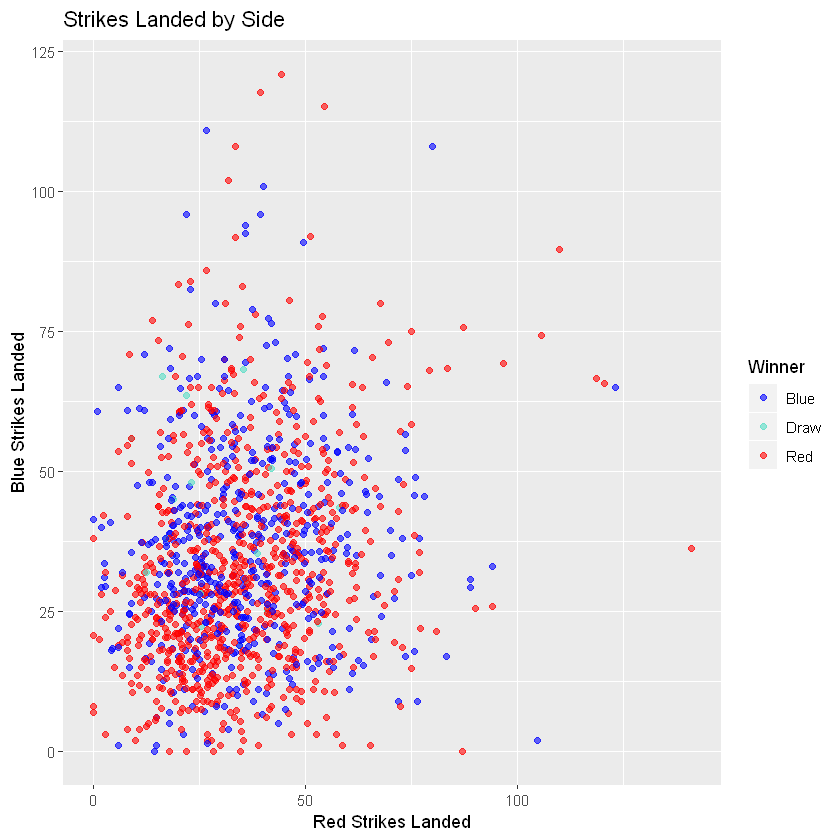

In [199]:
# 7/8 Make a plot/ easy solution

strike_scatterplot <- train %>% ggplot(aes(R_avg_SIG_STR_landed, B_avg_SIG_STR_landed, color=Winner)) +
    geom_point(alpha=0.6) + 
    labs(title="Strikes Landed by Side", x = "Red Strikes Landed", y = "Blue Strikes Landed") +
    scale_color_manual(values = c("blue", "#56ddc5", "red"))

strike_scatterplot

**Observations**

One of the first thoughts was that strikes would decide the outcome. I plotted the number of strikes landed from Red versus Blue and plotted with the colour of the winner. Surprisingly, there doesn't seem to be a correlation with the number and strikes and winner. This also validates that the spread of values is reasonable for the columns.    

### 8. Easy Solution/ 7. Make a Plot
#### The all the stats together at an equal value will predict a winner

In [200]:
# Extract the stats for each match and the winner
numer_values <- data.frame(scale(train[4:107]), train[108], train[3])

B_value <- numer_values %>%
    select(., starts_with("B")) %>%
    select(., -contains("opp"))

summary(B_value)

 B_avg_BODY_att    B_avg_BODY_landed B_avg_CLINCH_att  B_avg_CLINCH_landed
 Min.   :-1.3488   Min.   :-1.3233   Min.   :-1.1781   Min.   :-1.1024    
 1st Qu.:-0.7440   1st Qu.:-0.7462   1st Qu.:-0.6527   1st Qu.:-0.7022    
 Median :-0.2352   Median :-0.2653   Median :-0.2433   Median :-0.2343    
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000    
 3rd Qu.: 0.5327   3rd Qu.: 0.5362   3rd Qu.: 0.4243   3rd Qu.: 0.3824    
 Max.   : 5.1021   Max.   : 5.5054   Max.   : 6.9674   Max.   : 8.1332    
 B_avg_DISTANCE_att B_avg_DISTANCE_landed B_avg_GROUND_att  B_avg_GROUND_landed
 Min.   :-1.4449    Min.   :-1.3642       Min.   :-1.0561   Min.   :-1.0441    
 1st Qu.:-0.7524    1st Qu.:-0.7381       1st Qu.:-0.7399   1st Qu.:-0.7135    
 Median :-0.2286    Median :-0.2562       Median :-0.2261   Median :-0.2536    
 Mean   : 0.0000    Mean   : 0.0000       Mean   : 0.0000   Mean   : 0.0000    
 3rd Qu.: 0.5380    3rd Qu.: 0.5141       3rd Qu.: 0.4260   3rd Qu.: 0.4051

In [201]:
# Calculate a total score for the B fighter and R fighter

B_data <- numer_values %>%
    mutate(B_avg = select(., c(starts_with("B"))) %>%
                    select(., -contains("opp")) %>%
                    rowSums) %>%
    mutate(R_avg = select(., c(starts_with("R"))) %>%
                    select(., -contains("opp")) %>%
                    rowSums)
head(B_data)

B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,...,R_avg_opp_TOTAL_STR_landed,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,win_by,Winner,B_avg,R_avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
-0.07202581,-0.4576714,-0.2433381,-0.4097452,0.3126014,0.46870304,0.01099737,-0.1218726,0.3729881,0.61864607,...,-0.479867913,1.20049943,1.0861948,0.2055829,0.6790522,0.01457077,Decision - Unanimous,Red,-0.5492117,3.655002
-0.03842771,0.2155753,0.6913817,0.7447073,-0.3973725,0.02940355,5.25759819,5.3674195,0.6456773,1.97483864,...,-0.011716421,0.02302952,-0.1484218,-0.6162141,-0.1090716,1.01781706,Decision - Unanimous,Blue,26.1344199,5.723052
-1.07996887,-1.1309181,-0.2433381,-0.2712109,-1.2237357,-1.12186409,0.72240087,0.8003284,-0.8906935,-0.31025296,...,-1.468718513,0.90613196,0.5923482,0.2055829,-0.3717796,-0.48705237,Decision - Unanimous,Red,-6.9685444,-25.524865
0.48794255,0.4720502,0.3352980,0.6215657,-0.1645942,0.43335711,-0.14709230,-0.2828919,-0.3896549,0.03653601,...,0.001659336,1.20049943,0.8392715,1.3560988,-0.1090716,-0.23624080,Decision - Split,Blue,7.1890682,1.518699
-0.47520304,-0.4095823,-0.2767210,-0.4559233,0.2253096,1.15037467,-0.07792807,0.2294421,0.3264314,1.58470105,...,-0.619596802,1.78923439,2.0738880,3.3284118,0.4163443,-0.48705237,Decision - Unanimous,Red,8.4536406,12.847666
-1.16060431,-1.1309181,-1.0979391,-1.1024167,-0.9513850,-0.80678031,-0.79525994,-0.7981534,-1.1221468,-1.06823456,...,0.061850242,0.61176448,0.8392715,-0.2874953,0.9417602,1.51944021,Decision - Split,Red,-17.8823082,-5.104865


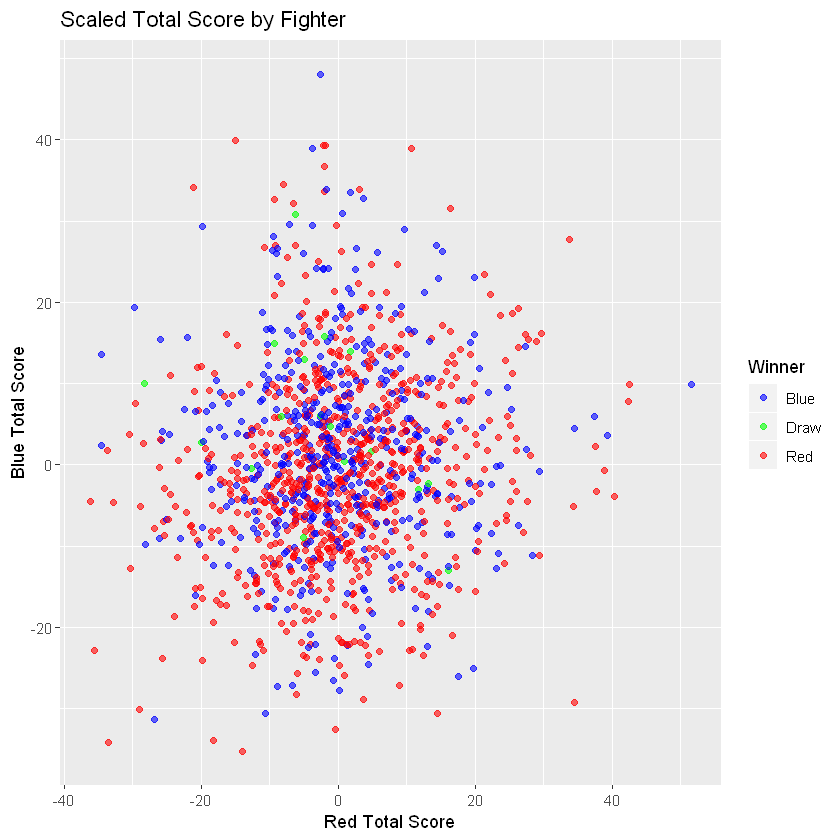

In [202]:
# plot the data for the total score of the blue and red fighter when they landed a punch
B_data %>%
 ggplot(aes(x=R_avg, y=B_avg, color=Winner)) +
   geom_point(alpha=0.6)+
    labs(title="Scaled Total Score by Fighter", x = "Red Total Score", y = "Blue Total Score") +
     scale_color_manual(values = c("blue", "green", "red"))

**Observations**

I find this chart very interesting as the total score (not including damage (ex. any column with opp) meaning having a higher overall stat did not predict the winner. The score was calculated using a scale to adjust all values in a column to the mean. We can try other measures, but this was meant to be the "easy solution".
There seems to be no relationship between the total score and the winner. For example, the red dot at (0, 50) is predicting the red person to win although they are behind by 50 points.
I think that this does end up weighting certain attributes in a match to getting a higher score. This also makes me excited for the project!